In [21]:
import typing 
import itertools

import pandas 
import seaborn

import cltrier_lib

import twon_agents

In [2]:
SEED: int = 1
METRICS: typing.List[str] = ["public_metrics.impression_count", "public_metrics.like_count", "public_metrics.retweet_count", "public_metrics.reply_count"]

In [3]:
posts: pandas.DataFrame = twon_agents.data.filter_tweets(
    pandas.read_csv("../data/raw/twitter.german/GermanyMdBTweets_2023.csv", index_col=0)
)
posts

,id,author_id,conversation_id,text,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,public_metrics.bookmark_count,created_at,username
2,1625441437167849472,1001837201276235777,1625441437167849472,Die verheerenden Folgen des Erdbebens in #Syri...,16,19,46,1,3104,NaN,2023-02-14T10:26:52.000Z,RenataAlt_MdB
3,1661308051817635841,1001837201276235777,1661308051817635841,Noch immer sind 50 Millionen Menschen Opfer mo...,3,0,6,0,297,0.0,2023-05-24T09:47:59.000Z,RenataAlt_MdB
5,1623983333993594883,1001837201276235777,1623983333993594883,Im #Bundestag haben wir heute den #PlanungsPus...,3,10,10,0,573,NaN,2023-02-10T09:52:53.000Z,RenataAlt_MdB
8,1663462991122124802,1001837201276235777,1663462991122124802,Gewaltausbruch im #Kosovo &amp; Angriff auf #K...,2,2,6,0,651,0.0,2023-05-30T08:30:57.000Z,RenataAlt_MdB
9,1618208860636090368,1001837201276235777,1618208860636090368,#Russland muss seine Bürger wegen #Menschenrec...,6,2,20,0,1094,NaN,2023-01-25T11:27:11.000Z,RenataAlt_MdB
...,...,...,...,...,...,...,...,...,...,...,...,...
154724,1613432190171336706,997138767763750912,1613432190171336706,"Es ist dringend geboten, denen zu danken 🙏, di...",2,0,9,0,989,NaN,2023-01-12T07:06:24.000Z,HerbrandMarkus
154735,1623988232596647936,997138767763750912,1623988232596647936,Mehr Tempo bei der Infrastruktur! Im #Bundesta...,1,0,5,0,492,NaN,2023-02-10T10:12:21.000Z,HerbrandMarkus
154768,1631697592986763277,997138767763750912,1631697592986763277,Wie erreichen wir die CO2-Neutralität der Best...,1,2,3,0,441,NaN,2023-03-03T16:46:36.000Z,HerbrandMarkus
154777,1656776953175719938,997138767763750912,1656776953175719938,Das #GEG ist ein handwerklich schlechtes Geset...,26,53,91,4,5944,0.0,2023-05-11T21:43:01.000Z,HerbrandMarkus


In [4]:
# calculate the distribution of replies
post_reply_dist: pandas.Series = posts["public_metrics.reply_count"].value_counts().describe(percentiles=[.25, .5, .75, .8, .85, .9, .95])
post_reply_dist

count     859.000000
mean       19.449360
std       171.168766
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
80%         6.000000
85%         8.000000
90%        15.000000
95%        30.100000
max      3762.000000
Name: count, dtype: float64

In [5]:
# generate a subset containing only the 90% most commented tweets
posts = posts[posts["public_metrics.reply_count"] > post_reply_dist.loc["90%"]]
len(posts)

4367

In [6]:
# calculate the distribution of user activity (number of posts)
user_activity_dist: pandas.Series = posts["username"].value_counts().describe(percentiles=[.25, .4, .5, .6, .75, .8, .85, .9, .95])
user_activity_dist

count    316.000000
mean      13.819620
std       30.475633
min        1.000000
25%        1.000000
40%        3.000000
50%        4.000000
60%        7.000000
75%       12.000000
80%       15.000000
85%       19.000000
90%       33.500000
95%       55.250000
max      299.000000
Name: count, dtype: float64

In [7]:
selected_percentile: str = "75%"

sampled_posts: pandas.DataFrame = (
    posts
    [   
        # select only the 80% most active users
        posts["username"].isin(
            list((posts["username"].value_counts() > user_activity_dist.loc[selected_percentile]).pipe(lambda _s : _s[_s]).index)
        )
    ]
    .groupby("username")
    # sample by number of least active 80%' user posts
    .sample(n=int(user_activity_dist.loc[selected_percentile]), random_state=SEED)
)

len(sampled_posts), len(sampled_posts["username"].unique())


(936, 78)

In [8]:
sampled_posts

,id,author_id,conversation_id,text,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,public_metrics.bookmark_count,created_at,username
130351,1640263711905423360,833398209053605888,1640263711905423360,Verheerende Bilanz der Ampel: 783.000 Tatverdä...,1050,367,6190,25,88673,NaN,2023-03-27T08:05:18.000Z,Alice_Weidel
130373,1629096801503420416,833398209053605888,1629096801503420416,"Statt jegliche Verhandlungen abzulehnen, täte ...",867,718,6375,36,114957,NaN,2023-02-24T12:31:59.000Z,Alice_Weidel
130279,1632391902698827777,833398209053605888,1632391650398937088,Die Wahrheit ist: Keine echte Fachkraft dieses...,283,101,3231,5,37191,NaN,2023-03-05T14:45:32.000Z,Alice_Weidel
130454,1628328481456025600,833398209053605888,1628328481456025600,Dass ein Gesundheitssystem das bedingungslose ...,1327,380,8580,35,125052,NaN,2023-02-22T09:38:57.000Z,Alice_Weidel
130467,1618971719229915138,833398209053605888,1618971038486003717,"#Deutschland braucht einen Außenminister, der ...",670,262,5924,14,73810,NaN,2023-01-27T13:58:31.000Z,Alice_Weidel
...,...,...,...,...,...,...,...,...,...,...,...,...
15339,1618281922291195905,1248662696318418950,1618281922291195905,"Jede Person, die gerade twittert, dass Deutsch...",37,585,320,28,23985,NaN,2023-01-25T16:17:31.000Z,zoe_gruene
15433,1632129891289186307,1248662696318418950,1632129891289186307,Wir müssen dringend mehr tun in der Klimapolit...,7,21,46,0,3963,NaN,2023-03-04T21:24:24.000Z,zoe_gruene
15354,1626181900942422017,1248662696318418950,1626181900942422017,Sinn der #Verkehrswende kann es übrigens nicht...,6,28,84,0,3464,NaN,2023-02-16T11:29:12.000Z,zoe_gruene
15447,1653096231927783424,1248662696318418950,1653096231927783424,Boris #Palmer ist kein Mitglied meiner Partei ...,18,574,309,12,23291,1.0,2023-05-01T17:57:09.000Z,zoe_gruene


In [11]:
sampled_posts_w_party = (
    sampled_posts
    .merge(
        right=pandas.read_json("../data/raw/twitter.german/mdb_meta.json"),
        left_on="username",
        right_on="twitter_username"
    )
    .pipe(lambda _df: _df[_df["role"] == "MdB"])
)

sampled_posts_w_party["party"].value_counts()

party
Bündnis 90/Die Grünen    180
FDP                      132
CDU/CSU                  120
AfD                       84
SPD                       60
Die Linke                 36
BSW                       12
Name: count, dtype: int64

In [12]:
sampled_posts_w_party.columns

Index(['id', 'author_id', 'conversation_id', 'text',
       'public_metrics.retweet_count', 'public_metrics.reply_count',
       'public_metrics.like_count', 'public_metrics.quote_count',
       'public_metrics.impression_count', 'public_metrics.bookmark_count',
       'created_at', 'username', 'twitter_username', 'first_name', 'last_name',
       'party', 'role'],
      dtype='object')

In [14]:
(
    sampled_posts_w_party
    [["first_name", "last_name", "party"]]
    .drop_duplicates()
    .set_index("party")
    .sort_index()
)

,first_name,last_name
party,,
AfD,Alice,Weidel
AfD,Tino,Chruppalla
AfD,René,Springer
AfD,Malte,Kaufmann
AfD,Joana,Cotar
AfD,Stefan,Brandner
AfD,Beatrix,von Storch
BSW,Sevim,Dağdelen
Bündnis 90/Die Grünen,Jan-Niclas,Gesenhues


In [16]:
(
    sampled_posts_w_party
    .reset_index()
    [["id", "author_id", "conversation_id", "first_name", "last_name", "username", "party", "created_at", "text"]]
    .to_csv("../data/interim/twitter.german.posts.csv")
)

In [17]:
user_metric = (
    sampled_posts_w_party
    [["username", *METRICS]]
    .groupby("username")
    .agg([
        "min",
        "max",
        "mean",
        "std",
    ])
    .sort_values(by=("public_metrics.like_count", "mean"), ascending=False)
    .round(3)
)
user_metric

public_metrics.impression_count                       \
                                            min      max        mean   
username                                                               
Alice_Weidel                              19222   262690   89190.083   
n_roettgen                                 7287   165518   37702.417   
Beatrix_vStorch                            7006    90479   41623.917   
Tino_Chrupalla                            15863   146077   53409.750   
Rene_Springer                              3437   166721   38261.250   
SevimDagdelen                              7150   256451   51099.417   
JoanaCotar                                 5006    33630   16785.500   
RKiesewetter                               3602   248604   43900.083   
KonstantinNotz                             8235   220512   64114.417   
GregorGysi                                16654   408176   91851.750   
MiRo_SPD                                   4486   124893   50450.833   
katjadler                                  7112   434239   93517.667   
_FriedrichMerz                            18078   212285   73432.750   
Ricarda_Lang                              14755   245712   79213.000   
fbanaszak                                  4552   118195   29898.750   
SerapGueler                                4280   548961   78668.583   
MalteKaufmann                              3127    46732   12693.583   
JN_Gesenhues                                602   144930   22447.833   
JuliaKloeckner                             4058   281523   48311.667   
hahnflo                                    3098  1385611  133596.167   
jamila_anna                                2346   117049   33325.000   
nyke_slawik                                3423   279082   65224.750   
johannesvogel                              6046   178178   40837.083   
maxmordhorst                               5179   172997   54612.833   
svenlehmann                                5917   140668   46188.750   
f_schaeffler                               8490   163919   37002.500   
MarioCzaja                                 4285   715000   84498.000   
MarcoBuschmann                            10509   284969   66780.750   
cem_oezdemir                              24164    92918   42537.333   
StBrandner                                 3814    44407   15939.500   
zoe_gruene                                 1647   103578   24148.083   
MarcusFaber                                2044    93540   18985.083   
Wissing                                    7751   452030   69279.833   
yooHannes                                  3493    88939   26791.750   
CarmenWegge                                6089    46475   22041.667   
GoeringEckardt                             3224   403558   52261.750   
c_lindner                                 25795   402904   76669.667   
VriesChristoph                             5675    30880   13383.333   
BriHasselmann                              2640   234123   39752.250   
kristine_lutke                             5707    61332   23189.333   
NicoleGohlke                               3315    62912   19242.583   
starkwatzinger                             8580   355698   71410.417   
christophploss                             8611    89441   41507.250   
b_riexinger                                2052    57570   11357.917   
max_lucks                                  2418    30184   11707.250   
christianduerr                             4044   223857   33571.000   
katdro                                     2322    76880   19740.417   
MatthiasHauer                              2555    77416   12281.833   
nouripour                                  4154   213204   31296.083   
Ralf_Stegner                               2314   167152   21887.750   
KatjaMast                                   996   111460   22319.250   
ReemAlabali                                2941    85386   17460.250   

                            public_metrics.like_count  

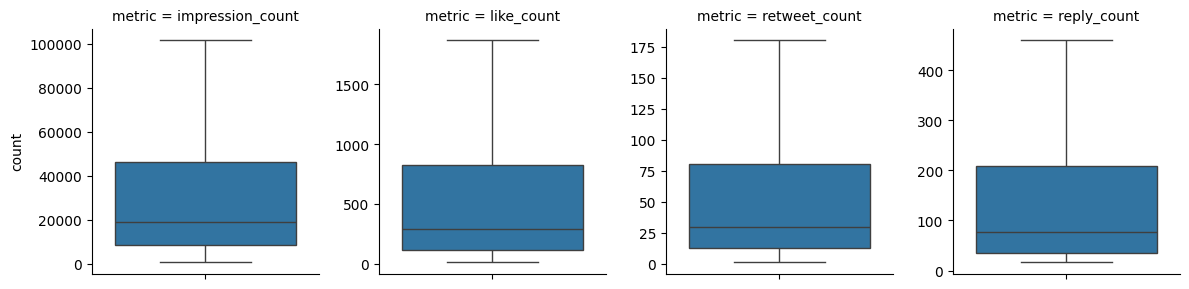

In [18]:
grid = seaborn.FacetGrid(
    data = (
        sampled_posts[METRICS]
        .melt(var_name="metric", value_name="count")
        .pipe(lambda _df: _df.assign(metric=_df["metric"].str.replace("public_metrics.", "")))
    ),
    col="metric",
    sharey=False
)
grid.map_dataframe(seaborn.boxplot, y="count", showfliers=False)

In [22]:
metrics_by_party = (
    sampled_posts
    .set_index("username")
    .merge(
        right=pandas.read_json("../data/raw/twitter.german/mdb_meta.json").set_index("twitter_username"),
        left_index=True,
        right_index=True
    )
    .pipe(lambda _df: _df[_df["role"] == "MdB"])
    [["party", *METRICS]]
    .groupby("party")
     .agg([
        "min",
        "max",
        "mean",
        "std",
    ])
    .sort_values(by=("public_metrics.like_count", "mean"), ascending=False)
)
metrics_by_party

public_metrics.impression_count                         \
                                                  min      max          mean   
party                                                                          
AfD                                              3127   262690  38271.940476   
BSW                                              7150   256451  51099.416667   
CDU/CSU                                          2555  1385611  56728.208333   
Die Linke                                        2052   408176  40817.416667   
Bündnis 90/Die Grünen                             602   403558  39243.161111   
FDP                                              2044   452030  53259.651515   
SPD                                               996   167152  26831.950000   

                                     public_metrics.like_count         \
                                 std                       min    max   
party                                                                   
AfD                     43308.890559                        77  12771   
BSW                     73779.411503                       364   4160   
CDU/CSU                152543.759506                        13  12022   
Die Linke               69787.727501                        23   1965   
Bündnis 90/Die Grünen   56054.910677                        17   5657   
FDP                     83620.493076                        16   3326   
SPD                     35685.893401                        12   2165   

                                                public_metrics.retweet_count  \
                              mean          std                          min   
party                                                                          
AfD                    2021.547619  2241.986267                            6   
BSW                    1268.166667  1379.515385                           59   
CDU/CSU                 768.366667  1552.332195                            1   
Die Linke               501.388889   529.594523                            3   
Bündnis 90/Die Grünen   486.600000   710.594956                            1   
FDP                     441.060606   591.399695                            3   
SPD                     336.316667   477.101009                            1   

                                                     \
                        max        mean         std   
party                                                 
AfD                    1697  295.500000  340.698591   
BSW                     823  240.583333  276.948127   
CDU/CSU                6424  168.925000  752.737304   
Die Linke               240   48.638889   53.670504   
Bündnis 90/Die Grünen   787   50.905556   84.353850   
FDP                     316   45.181818   59.861012   
SPD                     703   48.983333  103.546844   

                      public_metrics.reply_count                                
                                             min   max        mean         std  
party                                                                           
AfD                                           17  1195  209.702381  241.578932  
BSW                                           31  1304  260.583333  385.059018  
CDU/CSU                                       16  2236  191.241667  322.697584  
Die Linke                                     17   530  107.722222  134.332553  
Bündnis 90/Die Grünen                         16  2974  209.744444  345.743957  
FDP                                           16  3137  237.204545  391.678240  
SPD                                           18  1465  196.766667  319.633867

In [23]:
metrics_by_party.style.format({key: "{:.2f}" for key in itertools.product(METRICS, ["mean", "std"])}).background_gradient()

In [32]:
classified_data = pandas.json_normalize([sample.model_dump() for sample in cltrier_lib.classify.Pipeline()(list(sampled_posts["text"]), threshold=0.)])
classified_data

,sample,results.topics.arts_&_culture,results.topics.business_&_entrepreneurs,results.topics.celebrity_&_pop_culture,results.topics.diaries_&_daily_life,results.topics.family,results.topics.fashion_&_style,results.topics.film_tv_&_video,results.topics.fitness_&_health,results.topics.food_&_dining,...,results.emotions.trust,results.sentiment.negative,results.sentiment.neutral,results.sentiment.positive,results.irony.non_irony,results.irony.irony,results.offensive.non-offensive,results.offensive.offensive,results.hate.NOT-HATE,results.hate.HATE
0,Verheerende Bilanz der Ampel: 783.000 Tatverdä...,0.049216,0.019987,0.010495,0.034500,0.001857,0.002134,0.026215,0.001907,0.001466,...,0.023664,0.188873,0.799625,0.470375,0.804436,0.250622,0.701602,0.306480,0.962485,0.041475
1,"Statt jegliche Verhandlungen abzulehnen, täte ...",0.026015,0.010681,0.017340,0.033952,0.003003,0.001364,0.021956,0.002919,0.002413,...,0.023060,0.344867,0.781938,0.276057,0.757068,0.334605,0.683155,0.332109,0.894197,0.107060
2,Die Wahrheit ist: Keine echte Fachkraft dieses...,0.138921,0.008744,0.009765,0.104401,0.005710,0.001283,0.018704,0.001544,0.003554,...,0.056527,0.182271,0.806196,0.464130,0.791387,0.259459,0.690443,0.316999,0.947043,0.057651
3,Dass ein Gesundheitssystem das bedingungslose ...,0.080515,0.006388,0.014652,0.132132,0.005177,0.001326,0.011450,0.001943,0.002333,...,0.015827,0.225521,0.782119,0.431825,0.802817,0.290089,0.670879,0.347833,0.954157,0.050746
4,"#Deutschland braucht einen Außenminister, der ...",0.016002,0.008558,0.011285,0.031861,0.002017,0.001197,0.011644,0.002017,0.001156,...,0.038786,0.175190,0.795425,0.495959,0.803558,0.280722,0.700591,0.311810,0.954269,0.050717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,"Jede Person, die gerade twittert, dass Deutsch...",0.147713,0.006904,0.031888,0.311543,0.004672,0.002479,0.033514,0.001842,0.001680,...,0.057648,0.253709,0.774138,0.403954,0.808336,0.294278,0.631089,0.377539,0.963490,0.040592
932,Wir müssen dringend mehr tun in der Klimapolit...,0.122707,0.006968,0.038760,0.117788,0.005441,0.001767,0.027902,0.002934,0.001168,...,0.047150,0.178382,0.800701,0.490706,0.241948,0.784331,0.681229,0.327864,0.959038,0.047593
933,Sinn der #Verkehrswende kann es übrigens nicht...,0.155517,0.040401,0.017224,0.231362,0.003396,0.005779,0.031422,0.001277,0.003284,...,0.036142,0.185968,0.815146,0.476455,0.402942,0.653197,0.696138,0.318583,0.963905,0.044544
934,Boris #Palmer ist kein Mitglied meiner Partei ...,0.008709,0.004479,0.068571,0.025677,0.001535,0.001235,0.019723,0.003518,0.000713,...,0.030183,0.298675,0.740355,0.352405,0.729509,0.327332,0.670343,0.334304,0.941489,0.065155


<Axes: xlabel='value', ylabel='variable'>

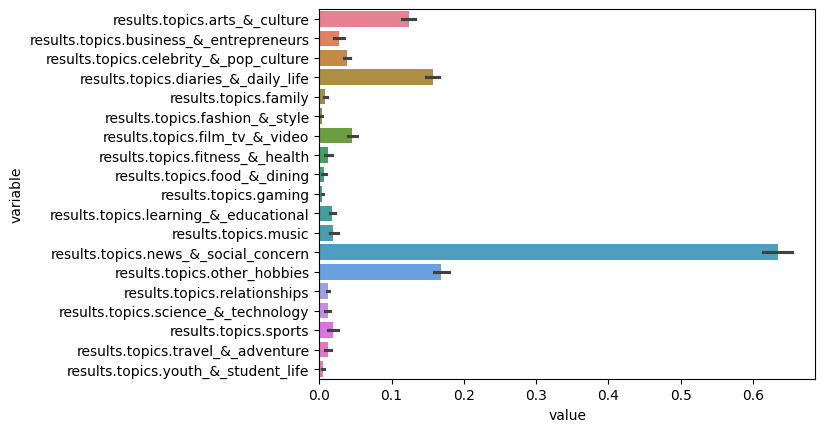

In [33]:
seaborn.barplot(
    classified_data.filter(like=".topics.").melt(),
    x="value", y="variable", hue="variable",
)

<Axes: xlabel='value', ylabel='variable'>

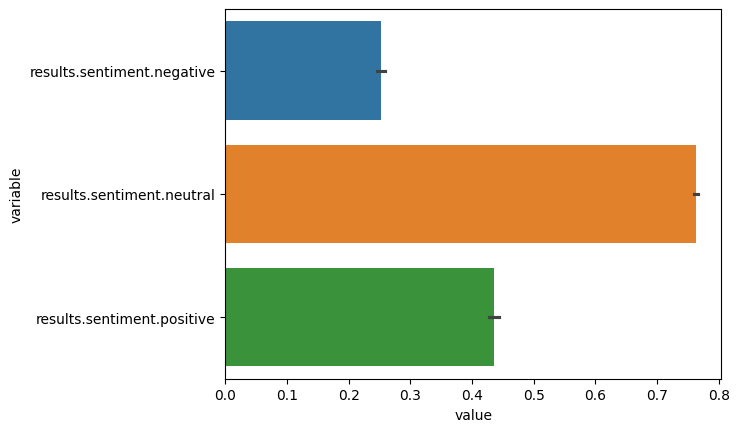

In [34]:
seaborn.barplot(
    classified_data.filter(like=".sentiment.").melt(),
    x="value", y="variable", hue="variable",
)

<Axes: xlabel='value', ylabel='variable'>

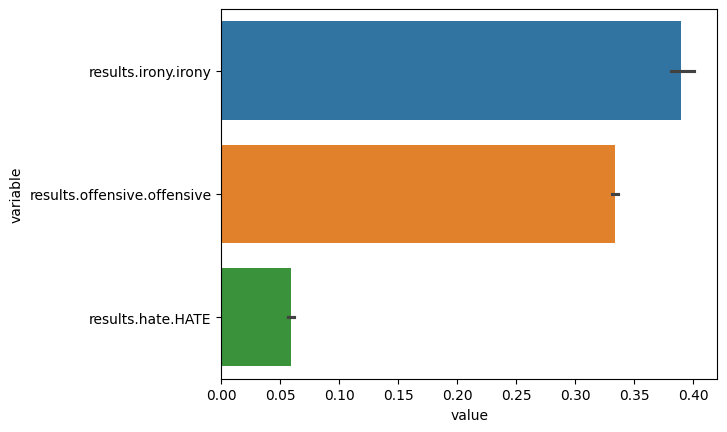

In [35]:
seaborn.barplot(
    classified_data.filter(regex="irony\.irony|offensive\.offensive|hate\.HATE").melt(),
    x="value", y="variable", hue="variable",
)